## Modules for plotting

In [13]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [1]:
import tensorflow as tf
import numpy as np

## What is numpy?

NumPy is the fundamental package for scientific computing with Python.

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- useful linear algebra, Fourier transform, and random number capabilities

Let's test it's random number capabilities

- `np.random.randn` : Return a sample (or samples) from the "standard normal" distribution.

In [22]:
mu = 0
sigma = 0.3
data_rnd_x = 0.5 + (sigma * np.random.randn(100))
noise = 0.1 * np.random.randn(100)
data_rnd_y = (1.2*data_rnd_x) + 2.4 + noise

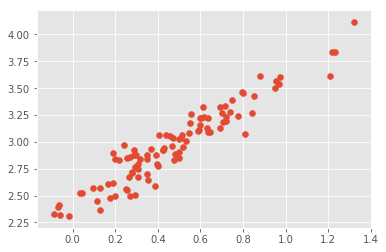

In [23]:
plt.scatter(data_rnd_x, data_rnd_y)
plt.show()

## Why would you do that?

What did I do?

1. Create n=100 random numbers, by sampling from a normal distribution, $\mathcal{N}(\mu=0, \sigma=0.3)$
2. Create the data generating distribution, $y = 1.2x + 2.4$
3. Add noise to it. Why? Because REAL data is noisy, due to measurement errors and many other factors. Noise is gaussian, drawn from $\mathcal{N}(\mu=0, \sigma=0.1)$

## Objective

Now forget the data generating distribution and all the other non-sense. We have two sets of data points, x (`data_rand_x`) and y (`data_rand_y`). We need to come up with a hypothesis, $y=mx + c$ or $y=wx + b$, that fits the data, and approximates the data generating distribution.

TLDR; 
- We need to arrive at `w=1.2` and `b=2.4`, given `data_rand_x` and `data_rand_y`, despite the noise

## Linear Regression

> Linear regression is an approach for modeling the relationship between a
scalar dependent variable `y` and, one or more independent variables denoted by `x`.

## Tensorflow Graph

In [27]:
tf.reset_default_graph()

- placeholders

In [28]:
x_ = tf.placeholder(tf.float32, name='x')
y_ = tf.placeholder(tf.float32, name='y')

- parameters

In [29]:
w = tf.get_variable(name='w', dtype=tf.float32, shape=(),
                    initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable(name='b', dtype=tf.float32, shape=(),
                   initializer=tf.contrib.layers.xavier_initializer())

- operation

In [32]:
prediction = (w*x_) + b

## Execute Graph

In [34]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

predicted_value, w_value, b_value = sess.run([prediction, w, b], feed_dict={
    x_ : data_rnd_x[0],
    y_ : data_rnd_y[0]
})

In [36]:
print('predicted value', predicted_value)
print('real value', data_rnd_y[0])
print('w : {}, b : {}'.format(w_value, b_value))
print('Real values')
print('w : 1.2, b : 2.4')

predicted value -0.177428
real value 3.09664410747
w : -1.6432671546936035, b : 0.8648260831832886
Real values
w : 1.2, b : 2.4


## Optimization

**Mean Square Error : MSE**
$$loss = (y - \hat{y})^2$$

In [37]:
loss = tf.square(y_ - prediction)
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# train op
train_op = optimizer.minimize(loss)

In [48]:
sess.run(tf.global_variables_initializer())
epochs = 100

for i in range(epochs):
    for batch_x, batch_y in zip(data_rnd_x, data_rnd_y):
        loss_value = sess.run([train_op, loss], feed_dict={
            x_ : batch_x,
            y_ : batch_y
        })
    # evaluate
    #  pick a random value from data
    w_value, b_value = sess.run([w, b])
    print('y = {}x + {}'.format(w_value, b_value))

y = 1.044123649597168x + 2.5119495391845703
y = 1.156640648841858x + 2.4477052688598633
y = 1.1826056241989136x + 2.432880401611328
y = 1.1885969638824463x + 2.4294593334198
y = 1.1899795532226562x + 2.4286699295043945
y = 1.1902990341186523x + 2.428487539291382
y = 1.1903728246688843x + 2.428445339202881
y = 1.1903893947601318x + 2.428435802459717
y = 1.190393090248108x + 2.428433895111084
y = 1.1903941631317139x + 2.428433418273926
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034x + 2.4284331798553467
y = 1.1903942823410034

## Sample from Hypothesis

In [70]:
samples_from_hypothesis = b_value + (w_value * data_rnd_x )

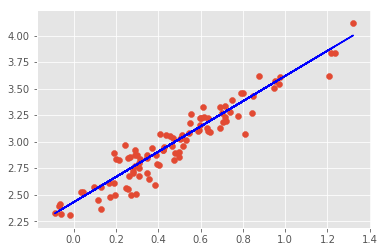

In [76]:
plt.plot(data_rnd_x, samples_from_hypothesis, 'blue')
plt.scatter(data_rnd_x, data_rnd_y)
plt.show()